In [7]:
#imports 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2 
import os
import tensorflow as tf 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from keras_facenet import FaceNet
from mtcnn.mtcnn import MTCNN

# Initialize FaceNet embedder and MTCNN detector
EMBEDDER = FaceNet()
DETECTOR = MTCNN()

INPUT_SIZE = (453, 453)


In [8]:
def extract_faces_from_group_photo_path(group_photo_path, DETECTOR): 

    """
    Extract faces from a group photo and return individual face images.

    Args:
    - group_photo_path (str): Path to the group photo.
    - detector: Face detection model.

    Returns:
    List of individual face images.
    """ 
    group_photo = cv2.imread(group_photo_path)
    group_photo = cv2.cvtColor(group_photo, cv2.COLOR_BGR2RGB)

    d_group_photo = group_photo.copy()

    faces = DETECTOR.detect_faces(group_photo)
    individual_photos = []

    for face in faces:
        x, y, w, h = face["box"]
        detected_group_photo = cv2.rectangle(d_group_photo, (x, y), (x + w, y + h), (0, 255, 0), 1)
        individual_face = group_photo[y: y+h, x: x+w]
        individual_photos.append(individual_face)

    plt.imshow(group_photo)

    return individual_photos

def extract_face_from_img_path(img_path, DETECTOR):

    """
    Extract a face from an image.

    Args:
    - img_path (str): Path to the image.
    - detector: Face detection model.

    Returns:
    Individual face image.
    """
        
    photo = cv2.imread(img_path)
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)

    d_photo = photo.copy()

    faces = DETECTOR.detect_faces(d_photo)
    x, y, w, h = faces[0]["box"]
    detected_photo = cv2.rectangle(d_photo, (x, y), (x + w, y + h), (0, 255, 0), 1)
    individual_face = photo[y: y+h, x: x+w]

    return individual_face


In [9]:
def img_list_to_embeddings(image_list, EMBEDDER):
    """
    Convert a list of images to their embeddings using the specified embedder.

    Args:
    - image_list (list): List of images.
    - embedder: Embedding model.

    Returns:
    List of embeddings.
    """
    processed_images = []

    for image in image_list:
        image = cv2.resize(image, INPUT_SIZE)
        processed_images.append(image)

    embeddings = EMBEDDER.embeddings(processed_images)

    return embeddings

In [10]:
def img_path_to_cv2_img(img_path):
    """
    Read an image from a file path and convert it to a NumPy array.

    Args:
    - img_path (str): Path to the image.

    Returns:
    Image as a NumPy array.
    """
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [11]:
def recognition(encoded_img, embeddings_of_group_photo, threshold):
    """
    Recognize a face based on its embedding.

    Args:
    - encoded_img: Embedding of the face to be recognized.
    - embeddings_of_group_photo (list): List of embeddings from the group photo.
    - threshold (float): Recognition threshold.

    Returns:
    True if recognized, False otherwise.
    """
    min_dist = 100

    for embedded_img in embeddings_of_group_photo:
        dist = np.linalg.norm(tf.subtract(embedded_img, encoded_img))
        if(dist < min_dist):
            min_dist = dist
    
    print(f"minimum distance {min_dist}")

    if(min_dist > threshold):
        return False
    else:
        return True

In [12]:
def check_attendence(database, embeddings_of_group_photo, threshold):
    """
    Check attendance based on face recognition against a database.

    Args:
    - database (dict): Dictionary containing embeddings of individuals.
    - embeddings_of_group_photo (list): List of embeddings from the group photo.
    - threshold (float): Recognition threshold.

    Returns:
    Dictionary indicating attendance for each person.
    """
    attendence = {}
    for person in database:
        flag = recognition(database[person][0], embeddings_of_group_photo, threshold)
        attendence[person] = flag 

    return attendence

4/4 [==============================] - 0s 29ms/step

*** Faces Extracted from group photo ***



C:\Users\hari3\AppData\Local\Temp\ipykernel_14460\42627123.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(individual_photos), i+1)


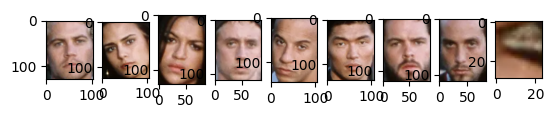

1/1 [==============================] - 4s 4s/step


In [13]:
# Extract faces from the group photo
individual_photos = extract_faces_from_group_photo_path("./group_photo.jpg", DETECTOR)

print("\n*** Faces Extracted from group photo ***\n")

for i, photo in enumerate(individual_photos):
    plt.subplot(1, len(individual_photos), i+1)
    plt.imshow(photo)

plt.show()

# Convert individual face images to embeddings
embeddings_of_group_photo = img_list_to_embeddings(individual_photos, EMBEDDER)


In [14]:
# Define a database of individuals with their embeddings
database = {}

database["galgadot"] = img_list_to_embeddings([extract_face_from_img_path("./images/galgadot.jpg", DETECTOR)], EMBEDDER)
database["jordana"] = img_list_to_embeddings([extract_face_from_img_path("./images/jordana.jpg", DETECTOR)], EMBEDDER)
database["paulwalker"] = img_list_to_embeddings([extract_face_from_img_path("./images/paulwalker.jpg", DETECTOR)], EMBEDDER)
database["rickyune"] = img_list_to_embeddings([extract_face_from_img_path("./images/rickyune.jpg", DETECTOR)], EMBEDDER)
database["rock"] = img_list_to_embeddings([extract_face_from_img_path("./images/rock.jpg", DETECTOR)], EMBEDDER)
database["vindiesel"] = img_list_to_embeddings([extract_face_from_img_path("./images/vindiesel.jpg", DETECTOR)], EMBEDDER)



1/1 [==============================] - 0s 89ms/step


2/2 [==============================] - 0s 5ms/step
Images fromm the database


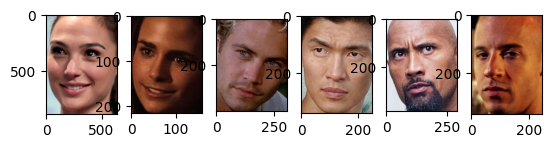

In [15]:
# Display images from the database

folder_path = './images/'
images = []

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Specify the image file extensions you want to display
        img_path = os.path.join(folder_path, filename)
        img = extract_face_from_img_path(img_path, DETECTOR)
        images.append(img)

print("Images fromm the database")
for i, photo in enumerate(images):
    plt.subplot(1, len(images), i+1)
    plt.imshow(photo)


plt.show()


In [19]:
attendence = check_attendence(database, embeddings_of_group_photo, 1)

minimum distance 1.2921222448349
minimum distance 0.8351553082466125
minimum distance 0.5709535479545593
minimum distance 0.6219140291213989
minimum distance 1.1600843667984009
minimum distance 0.660685658454895


In [20]:
# Check attendance based on face recognition
attendence

{'galgadot': False,
 'jordana': True,
 'paulwalker': True,
 'rickyune': True,
 'rock': False,
 'vindiesel': True}

In [21]:
import numpy as np

min_distances = [1.2921222448349, 0.8351553082466125, 0.5709535479545593,
                 0.6219140291213989, 1.1600843667984009, 0.660685658454895]

threshold_percentile = np.percentile(min_distances, 95)
print(f"Chosen threshold: {threshold_percentile}")

Chosen threshold: 1.2591127753257751
